## 1. Imports

In [1]:
from functools import partial
from data_prep import data_split_normalize
from mlp.tensor import Tensor
from tqdm import tqdm
from IPython.display import display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mlp.nn as nn

# for notebook
from tqdm.notebook import tqdm
from IPython.display import display, HTML

## 2. Data Preparation

### 2.1 Simple Data Exploration

In [2]:
file_path = 'data/data.csv'
column_names = ['ID'] + ['Feature_{}'.format(i) for i in range(1, 32)]
data = pd.read_csv(file_path, header=None, names=column_names)

# Display the first few rows of the dataframe with the new column names
data.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
summary_statistics = data.describe()
missing_values = data.isnull().sum()
data_types = data.dtypes

summary_statistics

,ID,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
missing_values

ID            0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
Feature_31    0
dtype: int64

In [5]:
data_types

ID              int64
Feature_1      object
Feature_2     float64
Feature_3     float64
Feature_4     float64
Feature_5     float64
Feature_6     float64
Feature_7     float64
Feature_8     float64
Feature_9     float64
Feature_10    float64
Feature_11    float64
Feature_12    float64
Feature_13    float64
Feature_14    float64
Feature_15    float64
Feature_16    float64
Feature_17    float64
Feature_18    float64
Feature_19    float64
Feature_20    float64
Feature_21    float64
Feature_22    float64
Feature_23    float64
Feature_24    float64
Feature_25    float64
Feature_26    float64
Feature_27    float64
Feature_28    float64
Feature_29    float64
Feature_30    float64
Feature_31    float64
dtype: object

In [6]:
X_train, y_train, X_valid, y_valid = data_split_normalize('data/data.csv', seed=42)

# Print a few rows of the raw training and validation data
print(f'Raw training data sample:\n{X_train[:5]}')
print(f'Raw training labels sample:\n{y_train[:5]}')
print(f'Raw validation data sample:\n{X_valid[:5]}')
print(f'Raw validation labels sample:\n{y_valid[:5]}')

Raw training data sample:
[[-0.18545209 -0.12866724  0.29054889  5.09575829 -0.27078646 -0.27066008
  -0.27065349 -0.2708647  -0.27052931 -0.27092281 -0.26791211 -0.26535899
  -0.25043431  0.21112031 -0.27113165 -0.27103993 -0.27103905 -0.27110865
  -0.27109751 -0.27114606 -0.14872185 -0.07188239  0.51961914 10.59871044
  -0.27053808 -0.26935806 -0.26940282 -0.27044286 -0.26996541 -0.27082385]
 [-0.2209097  -0.17913291  0.05274587  1.49075416 -0.27067236 -0.27074512
  -0.27095449 -0.27105797 -0.27034763 -0.27084856 -0.26972931 -0.26161575
  -0.26204142 -0.16311554 -0.27111045 -0.27108109 -0.27104248 -0.27112302
  -0.27107627 -0.27113851 -0.21362509 -0.13002762  0.09978866  2.0331504
  -0.2704727  -0.27042048 -0.27038581 -0.27088709 -0.2699439  -0.27076755]
 [-0.21362509 -0.20287371  0.11154935  2.05553083 -0.27054247 -0.27038142
  -0.27024714 -0.27073463 -0.27031121 -0.27081841 -0.269441   -0.26710203
  -0.26058011 -0.11905682 -0.27112453 -0.27102817 -0.27091578 -0.27109505
  -0.271088

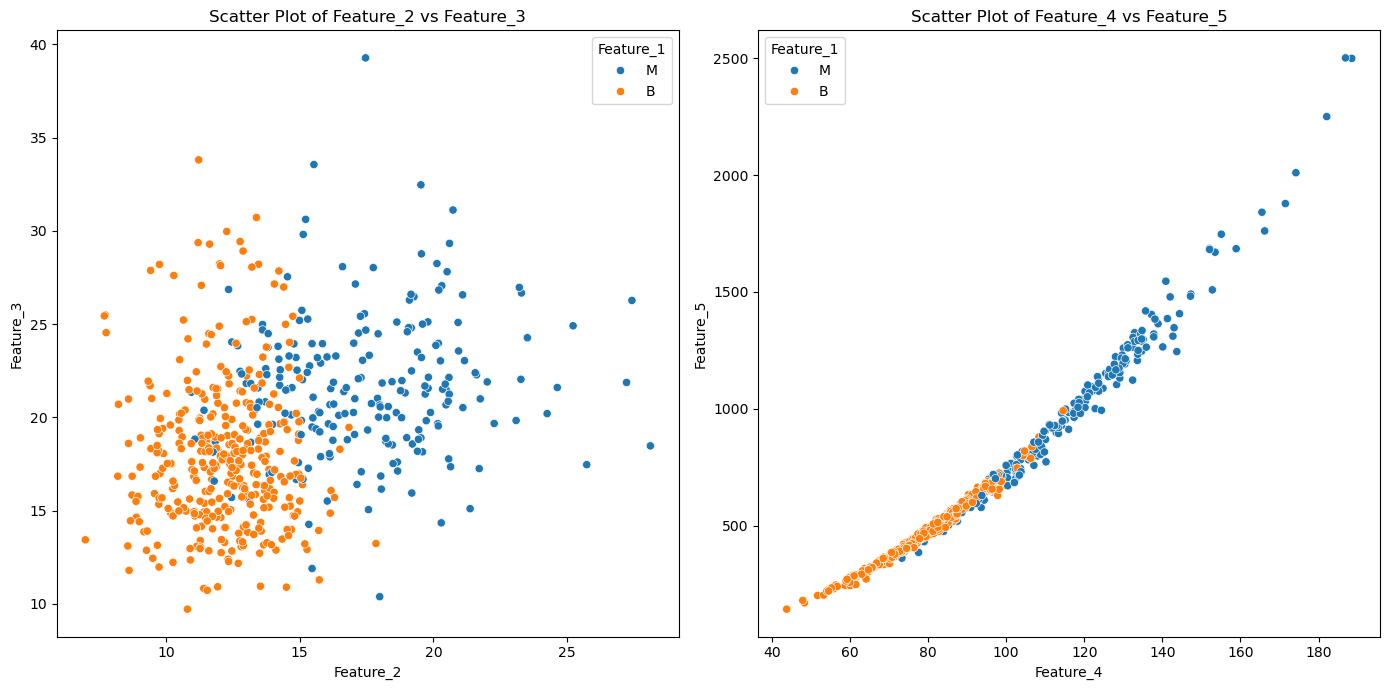

In [7]:
import seaborn as sns

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x=data['Feature_2'], y=data['Feature_3'], hue=data['Feature_1'])
plt.title('Scatter Plot of Feature_2 vs Feature_3')

plt.subplot(1, 2, 2)
sns.scatterplot(x=data['Feature_4'], y=data['Feature_5'], hue=data['Feature_1'])
plt.title('Scatter Plot of Feature_4 vs Feature_5')

plt.tight_layout()
plt.show()

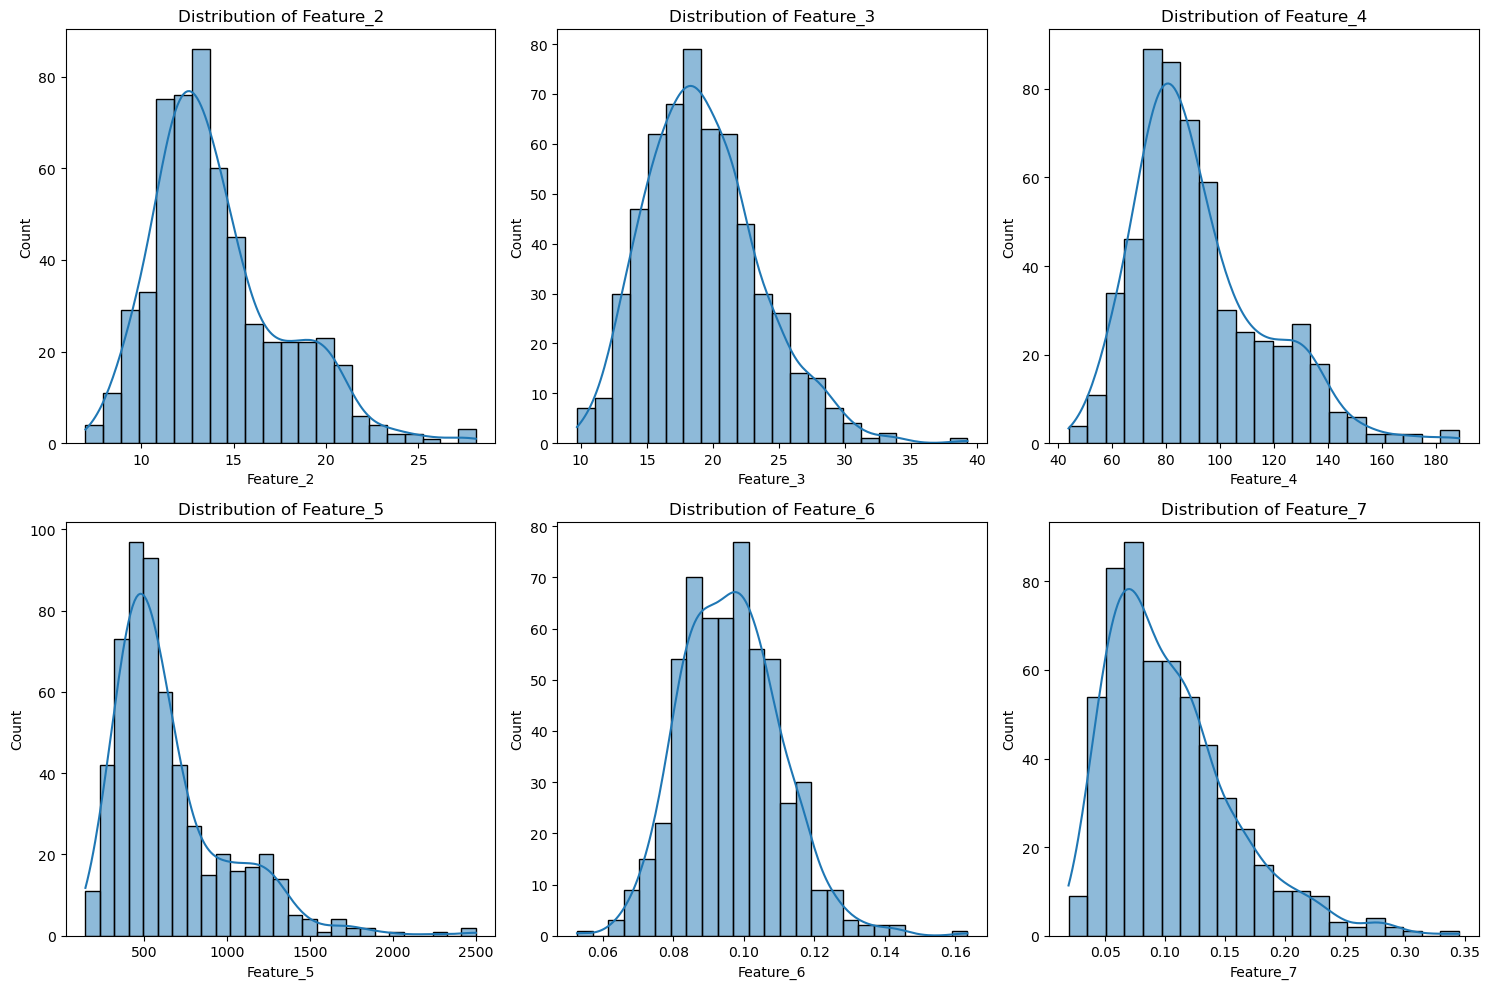

In [8]:
selected_features = ['Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7']

# Plot histograms for the selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()


In [9]:
print(f'Training set contains {X_train.shape[0]} samples with {X_train.shape[1]} features each.')
print(f'Validation set contains {X_valid.shape[0]} samples with {X_valid.shape[1]} features each.')

print(f'Unique labels in y_train: {set(y_train)}')
print(f'Unique labels in y_valid: {set(y_valid)}')

print(f'Label distribution in y_train: {dict((label, list(y_train).count(label)) for label in set(y_train))}')
print(f'Label distribution in y_valid: {dict((label, list(y_valid).count(label)) for label in set(y_valid))}')

Training set contains 454 samples with 30 features each.
Validation set contains 114 samples with 30 features each.
Unique labels in y_train: {0, 1}
Unique labels in y_valid: {0, 1}
Label distribution in y_train: {0: 289, 1: 165}
Label distribution in y_valid: {0: 68, 1: 46}


In [10]:
# Convert to Tensors
X_tr, y_tr, X_val, y_val = map(Tensor, (X_train, y_train, X_valid, y_valid))

# Print the data types and shapes after conversion
print(f'X_tr Tensor shape: {X_tr.shape}, type: {X_tr.dtype}')
print(f'y_tr Tensor shape: {y_tr.shape}, type: {y_tr.dtype}')
print(f'X_val Tensor shape: {X_val.shape}, type: {X_val.dtype}')
print(f'y_val Tensor shape: {y_val.shape}, type: {y_val.dtype}')

X_tr Tensor shape: (454, 30), type: float64
y_tr Tensor shape: (454,), type: int64
X_val Tensor shape: (114, 30), type: float64
y_val Tensor shape: (114,), type: int64


## 3. Model & Dataset Creation

In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_shape, output_shape):
        super(NeuralNetwork, self).__init__()
        self.dense1 = nn.Linear(in_features=input_shape, out_features=100)
        self.dense2 = nn.Linear(100, 50)
        self.dense3 = nn.Linear(50, 25)
        self.dense4 = nn.Linear(25, output_shape)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()

    def forward(self, x):
        x = self.relu(self.dense1(x))
        x = self.relu(self.dense2(x))
        x = self.relu(self.dense3(x))
        # print(self.dense4(x))
        x = self.dense4(x)
        return x

In [12]:
input_shape = X_tr.shape[1]
output_shape = 2

model = NeuralNetwork(input_shape, output_shape)
model

NeuralNetwork(
  (dense1): Linear(in_features=30, out_features=100, bias=True)
  (dense2): Linear(in_features=100, out_features=50, bias=True)
  (dense3): Linear(in_features=50, out_features=25, bias=True)
  (dense4): Linear(in_features=25, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax()
)

## Define the hyperparameters

In [13]:
bs = 128
lr = 0.05
n_epochs = 100

In [14]:
class MyDataset(nn.Dataset):
    def __init__(self, X, y):
        self.X = Tensor(X)
        self.y = Tensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]


tr_ds = MyDataset(X_tr, y_tr)
val_ds = MyDataset(X_val, y_val)
tr_dl = nn.DataLoader(tr_ds, batch_size=bs)
val_dl = nn.DataLoader(val_ds, batch_size=bs)

In [15]:
xb, yb = next(iter(tr_dl))
xb.shape, yb

((128, 30),
 m0san.Tensor([1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0
  1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0
  1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0
  1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1]))

In [16]:
xb.numpy().mean(), xb.numpy().std()

(0.01215061146345903, 1.0495593962387197)

## 4. Training

In [17]:
def fit(epochs, lr, model, loss_func, opt_fn, train_dl, valid_dl, patience=10, use_early_stoping=False):
    recorder = {'tr_loss': [], 'val_loss': [], 'tr_acc': [], 'val_acc': []}
    losses = [[], []]
    best_val_loss = float('inf')
    counter_early_stop = 0
    early_stop = False
    fig, axs = plt.subplots(1, 1, figsize=(14, 7))
    p = display(fig,display_id=True)

    opt = opt_fn(model.parameters(), lr=lr)
    
    for epoch in tqdm(range(epochs)):
        model.train()
        train_tot_loss, train_tot_acc, t_count = 0.,0.,0
        for xb,yb in train_dl:
            preds = model(xb)
            loss = loss_func(preds, yb)
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Calculate accuracy & loss
            predicted_labels = preds.argmax(axis=1)
            n = len(xb)
            t_count += n
            train_tot_loss += loss.item()*n
            train_tot_acc  += Tensor.accuracy(predicted_labels, yb).item()*n
            recorder['tr_loss'].append(loss.item())
            recorder['tr_acc'].append(Tensor.accuracy(predicted_labels, yb).item())
            losses[0].append(loss.item())

        model.eval()
        val_tot_loss, val_tot_acc,v_count = 0.,0.,0
        for xb,yb in valid_dl:
            preds = model(xb)

            pred_labels = preds.argmax(axis=1)
            n = len(xb)
            v_count += n
            val_tot_acc  += Tensor.accuracy(pred_labels, yb).item()*n
            val_tot_loss += loss_func(preds,yb).item()*n
            recorder['val_loss'].append(loss_func(preds,yb).item())
            recorder['val_acc'].append(Tensor.accuracy(pred_labels, yb).item())
            losses[1].append(loss_func(preds,yb).item())

            
        print(f"epoch {epoch + 1:02d}/{epochs:02d} - loss: {train_tot_loss/t_count:.4f} - acc: {train_tot_acc/t_count:.4f} - val_loss: {val_tot_loss/v_count:.4f} - val_acc: {val_tot_acc/v_count:.4f}")

        axs.plot(losses[0], c='#983FFF', linestyle='-',  label='Train Loss')
        axs.plot(losses[1], c='#FF9300', linestyle='--', label='Validation Loss')
        
        axs.grid(True)  # Enable gridlines
        axs.set_xlabel('Epochs')
        axs.set_ylabel('Loss')
        axs.set_title('Training and Validation Loss')
        
        p.update(fig)

        if use_early_stoping:
            if recorder['val_loss'][-1] < best_val_loss:
                best_val_loss = recorder['val_loss'][-1]
                counter_early_stop = 0
                # Save the best model
                model.save_weights(path='best_model.pth')
            else:
                counter_early_stop += 1
                if counter_early_stop >= patience:
                    print("Early stopping triggered")
                    early_stop = True
                    
            if early_stop:
                print("Stopped")
                break
            
    return recorder

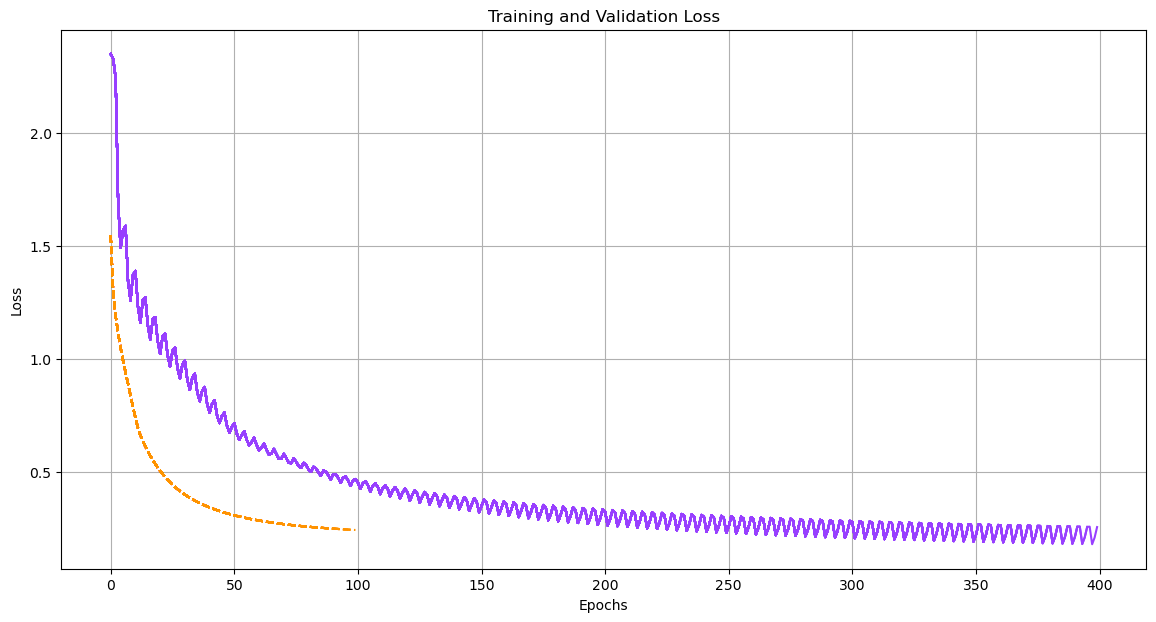

  0%|          | 0/100 [00:00<?, ?it/s]

epoch 01/100 - loss: 2.2104 - acc: 0.3634 - val_loss: 1.5472 - val_acc: 0.4035
epoch 02/100 - loss: 1.5185 - acc: 0.3546 - val_loss: 1.2969 - val_acc: 0.3860
epoch 03/100 - loss: 1.3236 - acc: 0.3238 - val_loss: 1.1903 - val_acc: 0.3684
epoch 04/100 - loss: 1.2191 - acc: 0.3128 - val_loss: 1.1143 - val_acc: 0.3596
epoch 05/100 - loss: 1.1388 - acc: 0.3128 - val_loss: 1.0493 - val_acc: 0.3772
epoch 06/100 - loss: 1.0699 - acc: 0.3194 - val_loss: 0.9930 - val_acc: 0.3860
epoch 07/100 - loss: 1.0095 - acc: 0.3414 - val_loss: 0.9413 - val_acc: 0.3860
epoch 08/100 - loss: 0.9531 - acc: 0.3524 - val_loss: 0.8911 - val_acc: 0.4035
epoch 09/100 - loss: 0.8982 - acc: 0.3612 - val_loss: 0.8396 - val_acc: 0.4035
epoch 10/100 - loss: 0.8429 - acc: 0.3612 - val_loss: 0.7886 - val_acc: 0.4035
epoch 11/100 - loss: 0.7885 - acc: 0.3634 - val_loss: 0.7407 - val_acc: 0.4035
epoch 12/100 - loss: 0.7374 - acc: 0.3634 - val_loss: 0.6968 - val_acc: 0.4035
epoch 13/100 - loss: 0.6935 - acc: 0.3634 - val_loss

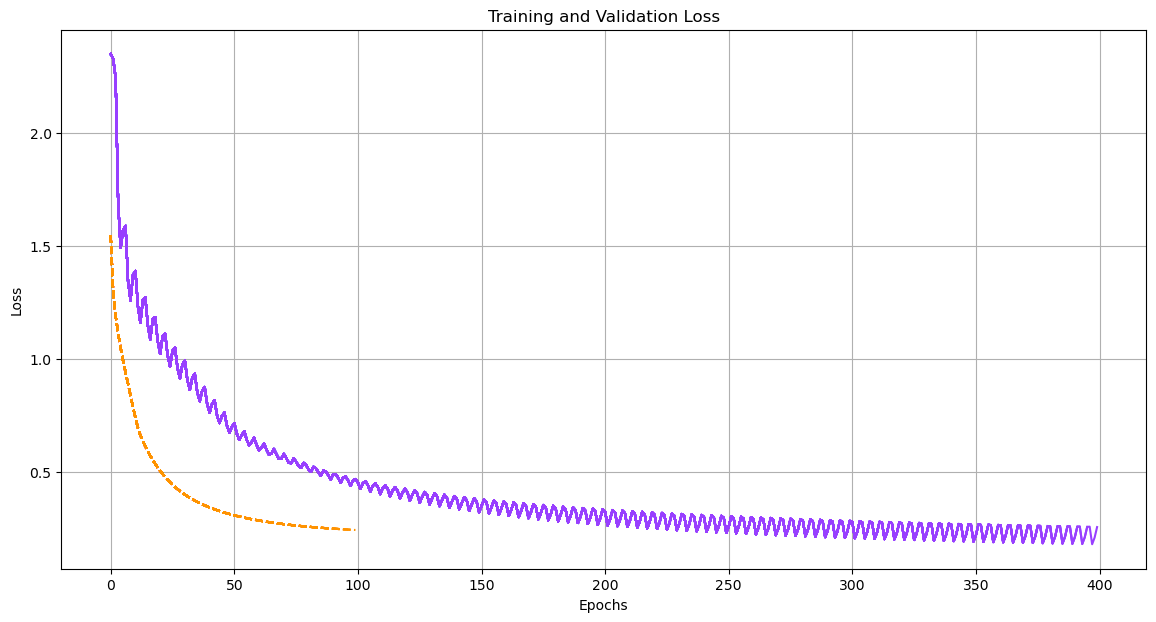

In [18]:
bs = 16
lr = 0.003
model = NeuralNetwork(input_shape, output_shape)
recorder = fit(n_epochs, lr, model, nn.CrossEntropyLoss(), nn.SGD, tr_dl, val_dl)

## 5. Interpreting Results

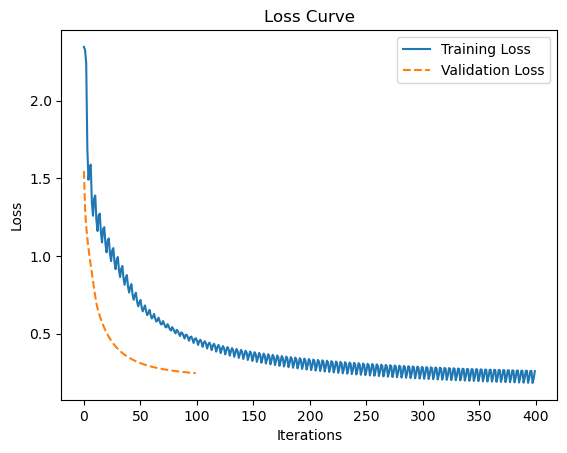

In [19]:
## plt.figure(figsize=(10, 7))
plt.plot(recorder['tr_loss'], label='Training Loss')
plt.plot(recorder['val_loss'], label='Validation Loss', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

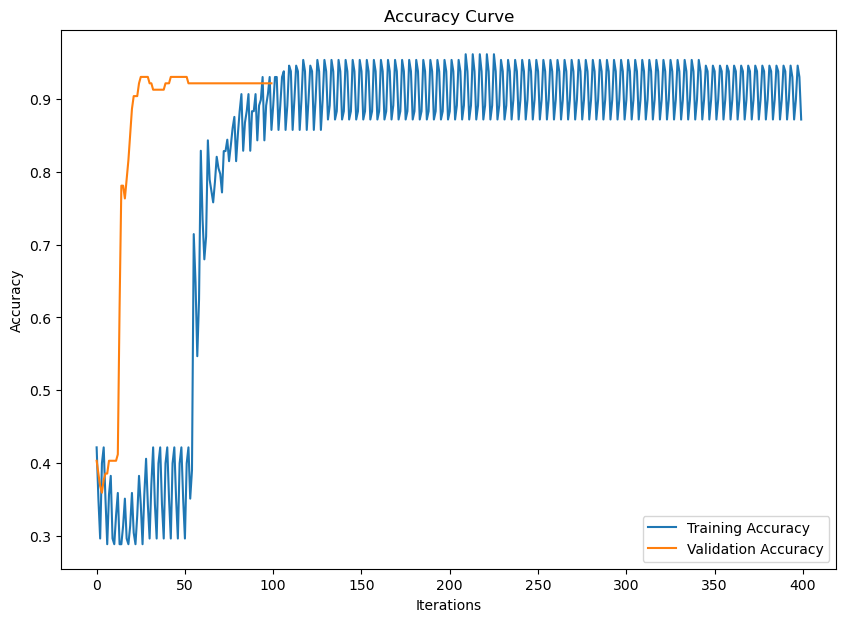

In [20]:
plt.figure(figsize=(10, 7))
plt.plot(recorder['tr_acc'], label='Training Accuracy')
plt.plot(recorder['val_acc'], label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

## 5. Save Model Weights

In [21]:
model.save_weights(path='model_params.pkl')

In [22]:
xb, yb = next(iter(val_dl))
xb.shape

(114, 30)

In [23]:
probs = model(xb)
pred_labels = probs.argmax(axis=1)
Tensor.accuracy(pred_labels, yb).item()

0.9210526315789473

In [24]:
model2 = NeuralNetwork(input_shape, output_shape)

In [25]:
probs = model2(xb)
pred_labels = probs.argmax(axis=1)
Tensor.accuracy(pred_labels, yb).item()

0.34210526315789475

In [26]:
model2.load_weights(path='model_params.pkl')

In [27]:
probs = model2(xb)
pred_labels = probs.argmax(axis=1)
Tensor.accuracy(pred_labels, yb).item()

0.9210526315789473

In [28]:
def predict(X, model):
    preds = model(X)
    pred_labels = preds.argmax(axis=1)
    return pred_labels

In [29]:
predict(X_val[5:15], model)

m0san.Tensor([0 0 0 1 1 0 0 0 1 0])

In [30]:
print(f'>>> Actual labels: {y_val[5:15]}')

>>> Actual labels: m0san.Tensor([0 0 0 1 1 0 0 0 1 0])
